In [0]:
pip install tensorflow-gpu==2.0.0


In [0]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense

print(tf.__version__) 

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [0]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
data = data['#Passengers']
data.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

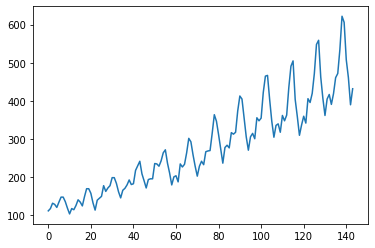

In [0]:
plt.plot(data)

In [0]:
data = np.array(data).reshape(-1,1)
data.shape

(144, 1)

In [0]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [0]:
train_size = 100
test_size = 44

In [0]:
train = data[0:100,:]  # 0 dekhi 100 samma sabai
test = data[100:144,:] # 100 dekhi 144 sammma sabai
train.shape,test.shape

((100, 1), (44, 1))

### build train and test data

In [0]:
def get_data(dataset,look_back):
  x = []
  y = []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i: (i + look_back),0 ]
    x.append(a)
    y.append(dataset[i+look_back,0])
  
  return np.array(x), np.array(y)


In [0]:
x_train,y_train = get_data(train,look_back=1)
x_train.shape, y_train.shape

((98, 1), (98,))

In [0]:
x_test, y_test = get_data(test,1)
x_test.shape,y_test.shape

((42, 1), (42,))

In [0]:
x_train = x_train.reshape(98,1,1)
x_test = x_test.reshape(42,1,1)
x_train.shape, x_test.shape

((98, 1, 1), (42, 1, 1))

converting 2-d data to 3-d

### model

In [0]:
model = Sequential()
model.add(LSTM(5,input_shape = (1,1)))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'adam')

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train,y_train, epochs=40,batch_size=1)

Train on 98 samples
Epoch 1/40
98/98 [==============================] - 2s 25ms/sample - loss: 0.0382
Epoch 2/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0160
Epoch 3/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0131
Epoch 4/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0116
Epoch 5/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0103
Epoch 6/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0089
Epoch 7/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 8/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0067
Epoch 9/40
98/98 [==============================] - 0s 2ms/sample - loss: 0.0056
Epoch 10/40
98/98 [==============================] - 0s 3ms/sample - loss: 0.0047
Epoch 11/40
98/98 [==============================] - 0s 3ms/sample - loss: 0.0040
Epoch 12/40
98/98 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoc

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred = scaler.inverse_transform(y_pred)

In [0]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

scale gareko data lai original banako

In [0]:
y_test

array([[9.37985280e+07],
       [1.10664344e+08],
       [1.21164152e+08],
       [1.21645200e+08],
       [1.06187072e+08],
       [9.17531120e+07],
       [8.09451760e+07],
       [8.89325600e+07],
       [8.99592320e+07],
       [8.43003680e+07],
       [9.55837280e+07],
       [9.20090880e+07],
       [9.58383920e+07],
       [1.13869144e+08],
       [1.27363408e+08],
       [1.30651072e+08],
       [1.06187072e+08],
       [9.48191760e+07],
       [8.22363840e+07],
       [8.91893360e+07],
       [9.50741360e+07],
       [9.04721440e+07],
       [1.06686720e+08],
       [1.04183312e+08],
       [1.10169104e+08],
       [1.22844824e+08],
       [1.40515664e+08],
       [1.42980656e+08],
       [1.20682392e+08],
       [1.06936360e+08],
       [9.55837280e+07],
       [1.06436976e+08],
       [1.09425168e+08],
       [1.02926880e+08],
       [1.09921256e+08],
       [1.20200000e+08],
       [1.22844824e+08],
       [1.37571328e+08],
       [1.56621648e+08],
       [1.53235168e+08],


In [0]:
scaler.scale_

array([0.0019305])

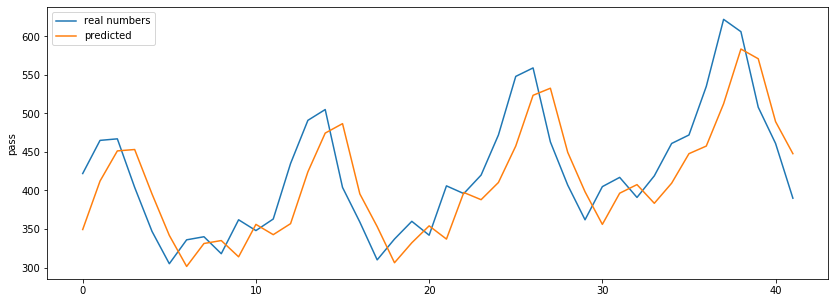

In [0]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label = "real numbers")
plt.plot(y_pred, label = "predicted")
plt.ylabel("pass")
plt.legend()
plt.show()


we can see the prediction is pretty good